First thing we're trying to do is create a list of each Box Score link to loop through.
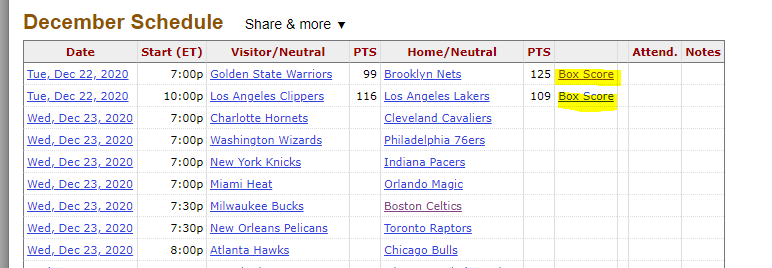

In [176]:
#If necessary, install BeautifulSoup4 and Pandas Packages:
#pip install BeautifulSoup4
#pip install pandas

In [1]:
#Import all Libraries required to run the Code:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

In [2]:
#Define the Original 
url = "https://www.basketball-reference.com/leagues/NBA_2021_games-december.html"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

#Next Steps:
#1) Have User Define both the Year and the Month(s)

In [3]:
#The schedule table provides 
links = [game['href'] for game in soup.find_all('a', text='Box Score')]
base_url = "https://www.basketball-reference.com"
links = [base_url + link for link in links]

#Next Steps:
#1) Work with looping through the different years/months.

In [4]:
#Test Case to scrape a Single URL before creating the loop.

#Pull in Tmp URL from Links[Link]
tmp = links[0]
page = requests.get(tmp)
soup = BeautifulSoup(page.text, 'html.parser')

tables = soup.find_all('table')
tables_id = [table['id'] for table in soup.find_all('table')]

team1_id = tables_id[0][4:7]
team1_basic = tables[0]
team1_adv = tables[7]

team2_id = tables_id[8][4:7]
team2_basic = tables[8]
team2_adv = tables[15]

In [5]:
player1_name = [[th.getText() for th in team1_basic.findAll('tr')[1:][i].findAll('th')]
            for i in range(len(team1_basic.findAll('tr')[1:]))]
player1_name.remove(player1_name[0])
player1_name.remove(player1_name[5])
player1_name.remove(player1_name[13])
df_player1_name = pd.DataFrame(player1_name)

team1_stats_basic = [[td.getText() for td in team1_basic.findAll('tr')[1:][i].findAll('td')]
            for i in range(len(team1_basic.findAll('tr')[1:]))]
team1_stats_basic.remove(team1_stats_basic[0])
team1_stats_basic.remove(team1_stats_basic[5])
team1_stats_basic.remove(team1_stats_basic[13])
df_team1_stats_basic = pd.DataFrame(team1_stats_basic)

team1_stats_adv = [[td.getText() for td in team1_adv.findAll('tr')[1:][i].findAll('td')]
            for i in range(len(team1_adv.findAll('tr')[1:]))]
team1_stats_adv.remove(team1_stats_adv[0])
team1_stats_adv.remove(team1_stats_adv[5])
team1_stats_adv.remove(team1_stats_adv[13])
df_team1_stats_adv = pd.DataFrame(team1_stats_adv)

game_id = links[0][47:59]
game_id = [game_id for i in range(len(team1_stats_basic))]
df_game_id = pd.DataFrame(game_id)

team1_name = [team1_id for i in range(len(team1_stats_basic))]
df_team1_name = pd.DataFrame(team1_name)

stats1 = pd.concat([df_game_id,df_team1_name,df_player1_name,df_team1_stats_basic,df_team1_stats_adv],axis=1)
print(stats1)

              0    0                      0      0  1   2      3  4   5   \
0   202012220BRK  GSW         Andrew Wiggins  31:14  4  16   .250  2   6   
1   202012220BRK  GSW          Stephen Curry  30:19  7  21   .333  2  10   
2   202012220BRK  GSW            Kelly Oubre  25:39  3  14   .214  0   6   
3   202012220BRK  GSW          James Wiseman  24:17  7  13   .538  1   1   
4   202012220BRK  GSW          Eric Paschall  21:33  2   6   .333  1   1   
5   202012220BRK  GSW         Brad Wanamaker  21:40  0   2   .000  0   1   
6   202012220BRK  GSW           Jordan Poole  17:55  1   4   .250  0   1   
7   202012220BRK  GSW  Juan Toscano-Anderson  13:15  2   2  1.000  0   0   
8   202012220BRK  GSW        Marquese Chriss  12:26  4  10   .400  1   3   
9   202012220BRK  GSW             Damion Lee  12:14  1   2   .500  1   1   
10  202012220BRK  GSW          Kent Bazemore  11:35  1   2   .500  0   1   
11  202012220BRK  GSW           Kevon Looney  11:17  2   4   .500  0   0   
12  20201222

In [6]:
player2_name = [[th.getText() for th in team2_basic.findAll('tr')[1:][i].findAll('th')]
            for i in range(len(team2_basic.findAll('tr')[1:]))]
player2_name.remove(player2_name[0])
player2_name.remove(player2_name[5])
player2_name.remove(player2_name[len(player2_name)-1])
df_player2_name = pd.DataFrame(player2_name)

team2_stats_basic = [[td.getText() for td in team2_basic.findAll('tr')[1:][i].findAll('td')]
            for i in range(len(team2_basic.findAll('tr')[1:]))]
team2_stats_basic.remove(team2_stats_basic[0])
team2_stats_basic.remove(team2_stats_basic[5])
team2_stats_basic.remove(team2_stats_basic[len(team2_stats_basic)-1])
df_team2_stats_basic = pd.DataFrame(team2_stats_basic)

team2_stats_adv = [[td.getText() for td in team2_adv.findAll('tr')[1:][i].findAll('td')]
            for i in range(len(team2_adv.findAll('tr')[1:]))]
team2_stats_adv.remove(team2_stats_adv[0])
team2_stats_adv.remove(team2_stats_adv[5])
team2_stats_adv.remove(team2_stats_adv[len(team2_stats_adv)-1])
df_team2_stats_adv = pd.DataFrame(team2_stats_adv)

team2_name = [team2_id for i in range(len(team2_stats_basic))]
df_team2_name = pd.DataFrame(team2_name)

game_id = links[0][47:59]
game_id = [game_id for i in range(len(team2_stats_basic))]
df_game_id = pd.DataFrame(game_id)

stats2 = pd.concat([df_game_id,df_team2_name,df_player2_name,df_team2_stats_basic,df_team2_stats_adv],axis=1)
print(stats2)

              0    0                        0      0   1   2      3  4  5   \
0   202012220BRK  BRK             Kyrie Irving  25:18  10  16   .625  4  7   
1   202012220BRK  BRK             Kevin Durant  24:56   7  16   .438  1  2   
2   202012220BRK  BRK               Joe Harris  20:46   4   8   .500  2  5   
3   202012220BRK  BRK        Spencer Dinwiddie  19:57   2   6   .333  1  3   
4   202012220BRK  BRK           DeAndre Jordan  17:03   2   3   .667  0  0   
5   202012220BRK  BRK             Caris LeVert  24:49   6  17   .353  3  5   
6   202012220BRK  BRK            Landry Shamet  19:43   1   4   .250  1  4   
7   202012220BRK  BRK            Jarrett Allen  19:37   2   3   .667  0  0   
8   202012220BRK  BRK               Jeff Green  17:17   3   4   .750  1  2   
9   202012220BRK  BRK           Taurean Prince  16:06   0   1   .000  0  1   
10  202012220BRK  BRK             Reggie Perry   7:46   1   3   .333  0  1   
11  202012220BRK  BRK              Bruce Brown   7:31   1   3   

In [10]:
stats = []
stats = stats1.append(stats2)
print(stats)

              0    0                        0      0   1   2      3  4   5   \
0   202012220BRK  GSW           Andrew Wiggins  31:14   4  16   .250  2   6   
1   202012220BRK  GSW            Stephen Curry  30:19   7  21   .333  2  10   
2   202012220BRK  GSW              Kelly Oubre  25:39   3  14   .214  0   6   
3   202012220BRK  GSW            James Wiseman  24:17   7  13   .538  1   1   
4   202012220BRK  GSW            Eric Paschall  21:33   2   6   .333  1   1   
5   202012220BRK  GSW           Brad Wanamaker  21:40   0   2   .000  0   1   
6   202012220BRK  GSW             Jordan Poole  17:55   1   4   .250  0   1   
7   202012220BRK  GSW    Juan Toscano-Anderson  13:15   2   2  1.000  0   0   
8   202012220BRK  GSW          Marquese Chriss  12:26   4  10   .400  1   3   
9   202012220BRK  GSW               Damion Lee  12:14   1   2   .500  1   1   
10  202012220BRK  GSW            Kent Bazemore  11:35   1   2   .500  0   1   
11  202012220BRK  GSW             Kevon Looney  11:1